### Mimic Pivot Table for Tracker Data

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('All_results_with_res_groups.csv', sep=',', index_col=None); df.head()

,Clip,Res,Res Group,Tracker,IOU_Thresh,Dist_Thresh,SOTP,SOTA,Recall,Precision,...,FPS,fp_count,fp_thresh_count,tp_count,fn_count,tn_count,N_objects,N_frames,N_match,TR
0,Bike03,1504,High,csrt,0.4,0.1,0.0300,1.0000,1.0000,0.7865,...,18.70,19,0,70,0,0,70,90,70,1.000
1,Slalom01,1504,High,csrt,0.4,0.1,0.1390,0.4242,0.4242,0.4242,...,22.88,0,57,42,0,0,99,100,99,1.000
2,Ski03,1920,High,csrt,0.4,0.1,0.0130,1.0000,1.0000,1.0000,...,15.61,0,0,1113,0,0,1113,1114,1113,1.000
3,Bike09,1920,High,csrt,0.4,0.1,0.0177,0.4218,0.4218,0.9286,...,16.67,11,0,143,196,86,339,437,143,0.422
4,Ski04,1920,High,csrt,0.4,0.1,0.0116,1.0000,1.0000,1.0000,...,16.22,0,0,253,0,0,253,254,253,1.000


### Loop through this line to mass produce the data required for the plots
Where SOTP and High are is where we loop through things

In [12]:
ser = df.groupby(['Tracker']).SOTP.mean(); ser

Tracker
csrt          0.023437
goturn        0.266165
kcf           0.009248
medianflow    0.170104
mil           0.104206
mosse         0.023836
tld           0.211819
Name: SOTP, dtype: float64

### VIZZES

In [27]:
N = 7
# means for each res group for each tracker
high_means = df.groupby(['Tracker', 'Res Group']).SOTP.mean().unstack().loc[:,('High')]
mid_means = df.groupby(['Tracker', 'Res Group']).SOTP.mean().unstack().loc[:,('Mid')]
low_means = df.groupby(['Tracker', 'Res Group']).SOTP.mean().unstack().loc[:,('Low')]
# means for each tracker
mean_means = df.groupby(['Tracker']).SOTP.mean()

#trackers = ('csrt', 'goturn', 'kcf', 'medianflow', 'mil', 'mosse', 'tld')
trackers = tuple(high_means.index)
groups = ('High', 'Mid', 'Low', 'Tracker Mean')

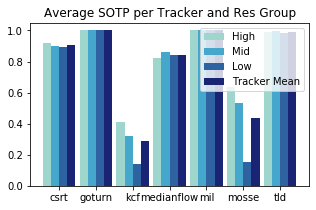

In [87]:
fig, ax = plt.subplots(figsize=(5,3))
# fig.subplots_adjust(hspace = .5, wspace=.15)
ind = np.arange(N)
width = 0.22

colours = ['#9ed5cd', '#44a7cb', '#2e62a1', '#192574']

p1 = ax.bar(ind, high_means, width, bottom=0, color=colours[0])
p2 = ax.bar(ind+width, mid_means, width, bottom=0, color=colours[1])
p3 = ax.bar(ind+2*width, low_means, width, bottom=0, color=colours[2])
p4 = ax.bar(ind+3*width, mean_means, width, bottom=0, color=colours[3])


ax.set_title('Average SOTP per Tracker and Res Group')
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(trackers)

ax.legend((p1[0], p2[0], p3[0], p4[0]), groups)
ax.autoscale_view()

plt.show()

In [78]:
dict = {'first': ['sub1', 'sub2']}

In [79]:
dict['first'][0]

'sub1'

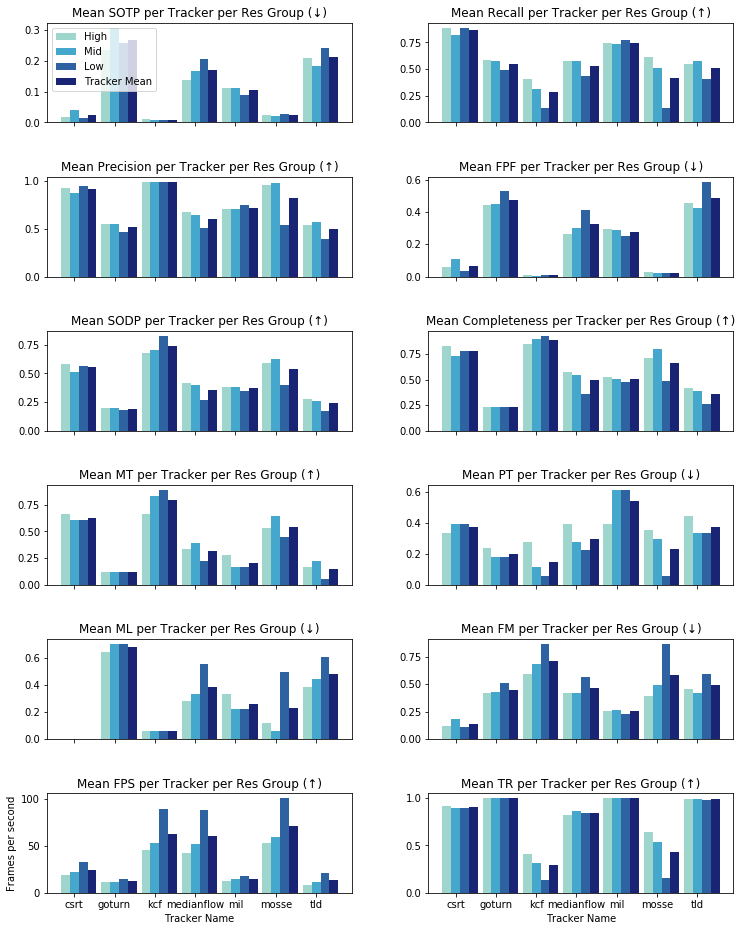

In [91]:
fig, axs = plt.subplots(6,2, figsize=(12.3, 16), sharex=True)
fig.subplots_adjust(hspace = .55, wspace=.25)

trackers = ('csrt', 'goturn', 'kcf', 'medianflow', 'mil', 'mosse', 'tld')
groups = ('High', 'Mid', 'Low', 'Tracker Mean')

# metrics = ('SOTP','Recall','Precision','FPF','SODP','MT','PT','ML','FM','FPS')
metrics = ('SOTP','Recall','Precision','FPF','SODP','Completeness','MT','PT','ML','FM','FPS','TR')
count = 1

for ax, m in zip(axs.ravel(), metrics):
    
    # means for each res group for each tracker
    high_means = df.groupby(['Tracker', 'Res Group'])[m].mean().unstack().loc[:,('High')]
    mid_means = df.groupby(['Tracker', 'Res Group'])[m].mean().unstack().loc[:,('Mid')]
    low_means = df.groupby(['Tracker', 'Res Group'])[m].mean().unstack().loc[:,('Low')]
    # means for each tracker
    mean_means = df.groupby(['Tracker'])[m].mean()
    
    width = 0.22
    
    colours = ['#9ed5cd', '#44a7cb', '#2e62a1', '#192574']

    p1 = ax.bar(ind, high_means, width, bottom=0, color=colours[0])
    p2 = ax.bar(ind+width, mid_means, width, bottom=0, color=colours[1])
    p3 = ax.bar(ind+2*width, low_means, width, bottom=0, color=colours[2])
    p4 = ax.bar(ind+3*width, mean_means, width, bottom=0, color=colours[3])
    
    def better(x):
        return {
            'SOTP': ['Lower', '\u2193'],
            'Recall': ['Higher', '\u2191'],
            'Precision': ['Higher', '\u2191'],
            'FPF': ['Lower', '\u2193'],
            'SODP': ['Higher', '\u2191'],
            'Completeness': ['Higher', '\u2191'],
            'MT': ['Higher', '\u2191'],
            'PT': ['Lower', '\u2193'],
            'ML': ['Lower', '\u2193'],
            'FM': ['Lower', '\u2193'],
            'FPS': ['Higher', '\u2191'],
            'TR': ['Higher', '\u2191']
        }[x]

    ax.set_title('Mean ' + str(m) + ' per Tracker per Res Group (' + better(m)[1] + ')')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(trackers)
    
    ax.set_xlabel('Tracker Name') if count == 11 or count == 12 else None
    ax.set_ylabel('Frames per second') if count == 11 else None
    
    ax.legend((p1[0], p2[0], p3[0], p4[0]), groups, loc='upper left') if count == 1 else None
    ax.autoscale_view()
    count += 1

fig.savefig('/Users/kierandonnelly/Google Drive/Masters 2018 - \
Kieran Donnelly (Data Science)/Reports/Report_LaTeX/Images/backups/trk-results-graphs.png', bbox_inches='tight')

### Practice and Storage Area

In [ ]:
ser = df.groupby(['Tracker', 'Res Group']).SOTP.mean()
ser

In [ ]:
temp = ser.unstack(); temp

In [11]:
pivot = pd.pivot_table(df, index=['Tracker'], columns=['Res Group'], aggfunc=np.mean, values=['SOTP']); pivot

SOTP                    
Res Group       High       Low       Mid
Tracker                                 
csrt        0.016517  0.012767  0.041028
goturn      0.234024  0.258129  0.306341
kcf         0.010072  0.008200  0.009472
medianflow  0.136200  0.206894  0.167217
mil         0.112506  0.089639  0.110472
mosse       0.025418  0.028060  0.019771
tld         0.209228  0.242356  0.183872